# Data Science Challenge: Titanic

In [1]:
# import base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read training data
train_data = pd.read_csv('Dataset/train.csv')

# read test data
submission_data = pd.read_csv('Dataset/test.csv')

In [3]:
print('Shape of train data: ', train_data.shape)
train_data.head()

Shape of train data:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Shape of test data: ', submission_data.shape)
submission_data.head()

Shape of test data:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visualize the Data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First we want to look at each category individually and check visually the survival rates for these

In [6]:
def plot_survivalRateByCategory(data,colnames):
    fig, ax = plt.subplots(len(colnames), figsize=(8,10), constrained_layout=True)
    # iterate through colnames
    for idx,colname in enumerate(colnames):
        # get mean and std dev for survival rates per category
        survivalByCategory = data.groupby([colname])['Survived'].describe()
        # number of differen categories
        n_category = survivalByCategory.shape[0]
        # plot one std dev confidence (confidence is capped between 0 and 1)
        for i in range(n_category):
            ax[idx].plot([i,i],
                         np.minimum(np.maximum(survivalByCategory['mean'].iloc[i]+np.array([-1,1])*survivalByCategory['std'].iloc[i],0),1),
                         'b');
        # plot survival rate
        ax[idx].plot(range(n_category),survivalByCategory['mean'],'bo', markersize=12);
        plt.sca(ax[idx])
        plt.xticks(np.array([-0.4]+ list(range(n_category)) + [n_category-1+.4]),
                   ['']+list(survivalByCategory.index)+['']);
        plt.yticks(np.arange(0,1.1,0.2),['']+[str(np.int8(s))+'%' for s in np.arange(.2,1.1,0.2)*100]);
        plt.title('Survival Rate By {0}'.format(colname), size=16);
    plt.show()

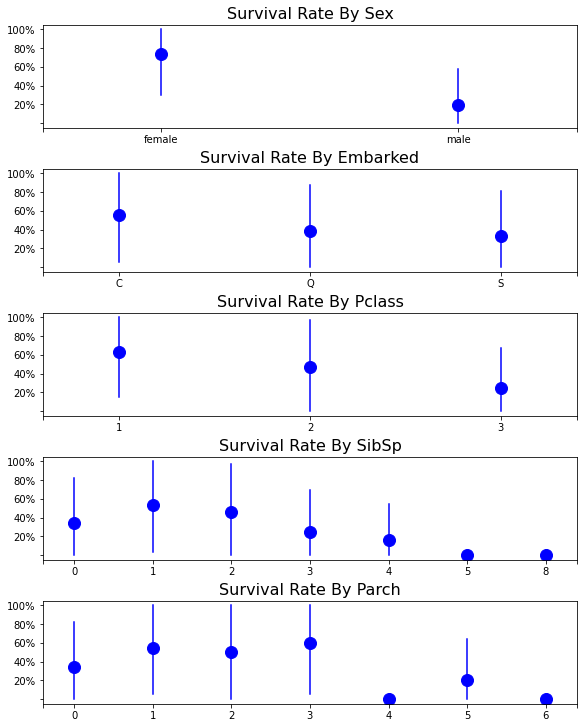

In [7]:
plot_survivalRateByCategory(train_data,['Sex','Embarked','Pclass','SibSp','Parch'])

Female had higher chance to live, as well as passengers that board at Cherbourg ($Embarked=C$). Also more wealthy passengers were more frequently rescued ($Plcass=1,2$). One standard deviations is almost always pretty high.

Second we look at the continous variables and their impact on how many people survived 

In [8]:
def plot_survivalRateByContinousVar(data,colnames):
    fig, ax = plt.subplots(len(colnames), figsize=(8,10), constrained_layout=True)
    # iterate through colnames
    for idx,colname in enumerate(colnames):
        # plot scatter dots
        ax[idx].scatter(train_data[colname],train_data['Survived']);
        # plot means for survived and died
        ax[idx].scatter(train_data.groupby(['Survived'])[colname].mean(),[0,1],c='red')
        plt.sca(ax[idx])
        plt.title('Scatterplot for {0}'.format(colname), size=16);
        plt.yticks([-.1,0,1,1.1],['','Died','Survived','']);
        plt.xlabel(colname);
    plt.show()

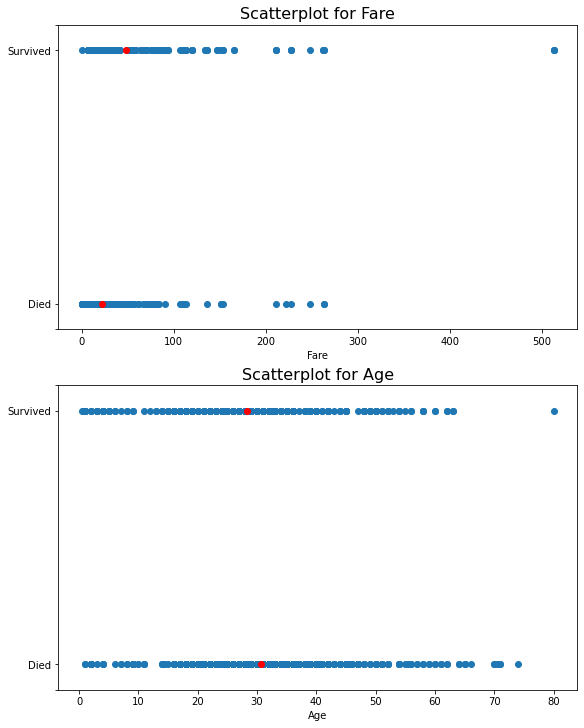

In [9]:
plot_survivalRateByContinousVar(train_data,['Fare','Age'])

Passengers that payed more money for the trip have survived more in mean but with a lot of dispersion. Also younger persons have survived a little more. 

In [10]:
# what happens with people that didn't pay for the trip
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## Data Preprocessing

### a) Remove uninformative Rows or Columns

In [11]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


PassengerId, Name, Ticket and Cabin are not informative such that we drop these variables 

In [12]:
# drop columns from both train and test sample
train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
submission_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

### b) NaN Handling

First, we count how many NaN entries we have for each column 

In [13]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
# For now just replace the missing age with its mean
train_data.loc[train_data['Age'].isna(),'Age'] = train_data['Age'].mean()

In [15]:
# And drop the missing Emparked rows
train_data.dropna(inplace=True)

In [16]:
# double check
train_data.isnull().isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Later we can perform regressions of ML algorithms to fill the NaNs in order to not loose too much information. 

### c) Outlier Handling

Let's skip this for now. 

### d) Prepare data for modelling 

In [17]:
# map string of "Sex" variable to integer value
train_data['Sex'].replace({'male':0, 'female':1}, inplace=True)
submission_data['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [18]:
# try one hot encoding or transformation into integers
one_hot = False

if one_hot:
    # one hot encoding
    train_data = pd.get_dummies(train_data)
    submission_data  = pd.get_dummies(submission_data)
else:
    # map string of "Embarked" variable to integer value
    train_data['Embarked'].replace({'C':0, 'Q':1, 'S':2}, inplace=True)
    submission_data['Embarked'].replace({'C':0, 'Q':1, 'S':2}, inplace=True)

In [19]:
# keep dependent and explanatory variables separate
y_full = train_data['Survived']
X_full = train_data.drop('Survived', axis=1)

In [20]:
# perform train test split for hyperparameter tuning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, stratify=y_full, random_state=1121218
)

## Model Training

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### a) Random Forest 

With random forests we can use the full dataset because bootstrap samples include in mean only 66% of the data in one tree. With the remaining (called out-of-bag) we predict the accuracy

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Instantiate model with 5000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.oob_score=True
# Train the model on training data
rf.fit(X_train, y_train);

In [24]:
1-rf.oob_score_

0.6523189111343272

In [25]:
pred_rf = rf.predict(X_test)

accuracy_score(y_test,np.round(pred_rf))

0.8340807174887892

### b) XGBoost

In [26]:
import xgboost as xgb

In [27]:
# Init classifier
xgb_cl = xgb.XGBClassifier(use_label_encoder=False,
                           eval_metric='logloss')

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
pred_xgb = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, pred_xgb)

0.8340807174887892

Try other parameters, other than default settings with GridSearchCV 

In [39]:
# set potential parameters

parameters = {'eta':[.2,.3,.4],    # learning rate/ step size
              'max_depth':[4,6,8], # max depth of sub tree
              'eval_metric':('logloss','error'),
              'lambda':[0,.1,.2],
              'alpha':[0,.1,.2]}
clf = GridSearchCV(xgb_cl, parameters)

In [40]:
# fit model
clf.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=10,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     sc

In [42]:
# get the best estimator
clf.best_estimator_

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, eval_metric='logloss', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', lambda=0,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=10, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact', ...)

In [47]:
# Init classifier
xgb_cl = xgb.XGBClassifier(reg_alpha=0,eta=0.2, eval_metric='logloss',
                           reg_lambda=0, max_depth=4,use_label_encoder=False)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
pred_xgb = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, pred_xgb)

0.8161434977578476

### c) Combine XGBoost with Bagging

In [28]:
# define bagging meta estimator
def bagging(classifier, X_train, X_test, y_train, bootstrap_samples=500):
    
    # get number of observations
    N_Xtrain = X_train.shape[0]
    
    # matrix version of df for faster performance
    Xtrain = np.copy(X_train)
    ytrain = np.copy(y_train)
    
    # get array of indices which bootstrap samples should be used
    bootstrap_idx = np.random.randint(low=0, high=N_Xtrain, size=(N_Xtrain,bootstrap_samples))
    
    # initialize prediction vector
    bagg_full = np.empty((y_test.shape[0],bootstrap_samples))
    
    # train for each bootstrap sample one XGBoost machine
    for boot_id in range(bootstrap_samples):
        # Fit XGB for bootstrap sample "boot_id"
        classifier.fit(Xtrain[bootstrap_idx[:,boot_id],:], ytrain[bootstrap_idx[:,boot_id]])

        # Predict
        bagg_full[:,boot_id] = classifier.predict(X_test)
        
    return np.mean(bagg_full, axis=1)

In [29]:
pred_xgb_bagg = bagging(xgb_cl, X_train, X_test, y_train)

In [30]:
# Score
accuracy_score(y_test, np.round(pred_xgb_bagg))

0.8340807174887892

So we have trained the same machine as in b) but got much better prediction power, awesome! And it does beat the random forest. 

Also check prewritten function for bagging meta classifier

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
xgb_bagg = BaggingClassifier(xgb.XGBClassifier(use_label_encoder=False,
                                               eval_metric='logloss'),
                             n_estimators=200)

In [52]:
# Fit
xgb_bagg.fit(X_train, y_train)

# Predict
pred_xgb_bagg_new = xgb_bagg.predict(X_test)

# Score
accuracy_score(y_test, pred_xgb_bagg_new)

0.852017937219731

Same outcome but this BaggingClassifier function takes ages...

### d) SVM 

In [31]:
from sklearn.svm import SVC

In [32]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

# fit model
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [40]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [33]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
accuracy_score(y_test,pred_svm)

0.7937219730941704

In [ ]:
svm = SVC(kernel='linear', C=1)
pred_svm_bagg = bagging(svm, X_train, X_test, y_train,bootstrap_samples=30)

In [ ]:
accuracy_score(y_test, np.round(pred_svm_bagg))

### e) Combination of bagged estimators

In [ ]:
# now combine all 3 estimators
pred_stack = np.round((pred_rf + pred_xgb_bagg + pred_svm_bagg)/3)

# get accuracy
accuracy_score(y_test,pred_stack)